[View in Colaboratory](https://colab.research.google.com/github/algorismes/slides/blob/master/Uncertinty_Jose.ipynb)

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense, concatenate, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop, Nadam
from keras.initializers import RandomNormal
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

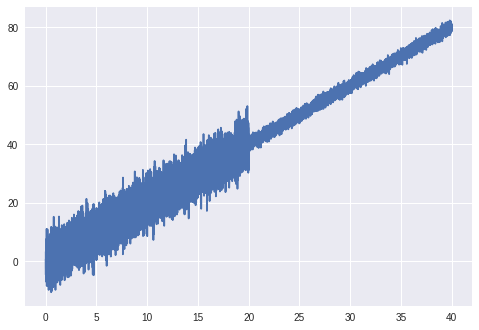

In [5]:
x = np.linspace(0, 20, 10000)#, dtype="int32")  # 100000 values between 0 and 100
delta = np.random.normal(0, 4, x.size)
y = 2*x + delta
x2 = np.linspace(20, 40, 10000)
delta2 = np.random.normal(0, 1, x2.size)
y2 = 2*x2 + delta2
x = np.append(x, x2)
y = np.append(y, y2)
plt.plot(x,y)
plt.show()

Epoch 1/40
20000/20000 [==============================] - 0s 11us/step - loss: 897.6005 - mean_squared_error: 897.6005
Epoch 2/40
20000/20000 [==============================] - 0s 8us/step - loss: 77.4002 - mean_squared_error: 77.4002
Epoch 3/40
20000/20000 [==============================] - 0s 9us/step - loss: 10.9018 - mean_squared_error: 10.9018
Epoch 4/40
20000/20000 [==============================] - 0s 9us/step - loss: 9.2736 - mean_squared_error: 9.2736
Epoch 5/40
20000/20000 [==============================] - 0s 9us/step - loss: 9.2133 - mean_squared_error: 9.2133
Epoch 6/40
20000/20000 [==============================] - 0s 9us/step - loss: 9.1575 - mean_squared_error: 9.1575
Epoch 7/40
20000/20000 [==============================] - 0s 9us/step - loss: 9.1002 - mean_squared_error: 9.1002
Epoch 8/40
20000/20000 [==============================] - 0s 8us/step - loss: 9.0404 - mean_squared_error: 9.0404
Epoch 9/40
20000/20000 [==============================] - 0s 8us/step - loss: 8

Epoch 19/40
20000/20000 [==============================] - 0s 10us/step - loss: 8.5368 - mean_squared_error: 8.5368
Epoch 20/40
20000/20000 [==============================] - 0s 9us/step - loss: 8.5162 - mean_squared_error: 8.5162
Epoch 21/40
20000/20000 [==============================] - 0s 9us/step - loss: 8.5006 - mean_squared_error: 8.5006
Epoch 22/40
20000/20000 [==============================] - 0s 9us/step - loss: 8.4894 - mean_squared_error: 8.4894
Epoch 23/40
20000/20000 [==============================] - 0s 9us/step - loss: 8.4807 - mean_squared_error: 8.4807
Epoch 24/40
20000/20000 [==============================] - 0s 9us/step - loss: 8.4746 - mean_squared_error: 8.4746
Epoch 25/40
20000/20000 [==============================] - 0s 8us/step - loss: 8.4690 - mean_squared_error: 8.4690
Epoch 26/40
20000/20000 [==============================] - 0s 9us/step - loss: 8.4675 - mean_squared_error: 8.4675
Epoch 27/40
20000/20000 [==============================] - 0s 9us/step - loss: 

Epoch 37/40
20000/20000 [==============================] - 0s 9us/step - loss: 8.4654 - mean_squared_error: 8.4654
Epoch 38/40
20000/20000 [==============================] - 0s 9us/step - loss: 8.4625 - mean_squared_error: 8.4625
Epoch 39/40
20000/20000 [==============================] - 0s 9us/step - loss: 8.4639 - mean_squared_error: 8.4639
Epoch 40/40
20000/20000 [==============================] - 0s 9us/step - loss: 8.4637 - mean_squared_error: 8.4637


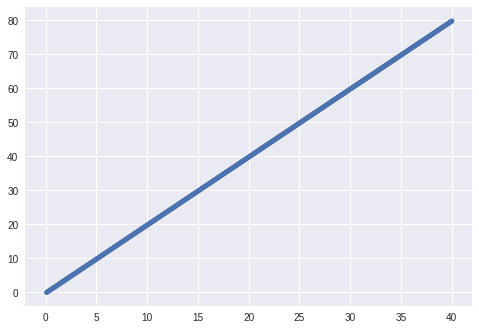

In [6]:
def aleatoric_loss(y_true, y_pred):
    sigma = K.log(K.exp(y_pred[:, 1]) + 1)
    epsilon = 1e-6
    y_pred_prima = y_pred[:, 0]
    output_value = ((K.square(y_pred_prima - y_true[:, 0])) / (K.square(sigma) + epsilon)) + K.log(K.square(sigma) + epsilon)
    return K.mean(output_value, axis=-1)

def aleatoric_rms(y_true, y_pred):
    y_pred_prima = y_pred[:, 0]
    return K.mean(K.square(y_pred_prima - y_true[:, 0]), axis=-1)

def aleatoric_uncertainty(y_true, y_pred):
    sigma = K.abs(y_pred[:, 1])
    return K.max(K.log(K.square(sigma)), axis=-1)
  
raw_inputs = Input(shape=(1,))
raw_preds = Dense(1, activation='linear', name="preds")(raw_inputs)

rawmodel = Model(inputs=raw_inputs,outputs=raw_preds)
rawmodel.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error', metrics=['mean_squared_error'])
rawmodel.fit(x, y, batch_size=128, epochs=40, shuffle=True)
x_raw_pred = np.array([1,2,3,4,5,6,7,8,9,10,15,20])
raw_result = rawmodel.predict(x)

plt.plot(x, raw_result[:,0],'.', alpha=0.5)
plt.show()


In [0]:
# https://keras.io/
!pip install -q keras
import keras

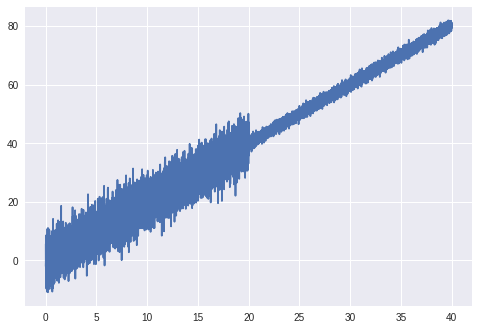

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
layer1 (Dense)                  (None, 15)           30          input_2[0][0]                    
__________________________________________________________________________________________________
layer2 (Dense)                  (None, 10)           160         layer1[0][0]                     
__________________________________________________________________________________________________
preds (Dense)                   (None, 1)            2           input_2[0][0]                    
__________________________________________________________________________________________________
sigma (Den

In [8]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense, concatenate, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop, Nadam
from keras.initializers import RandomNormal
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 20, 10000)#, dtype="int32")  # 100000 values between 0 and 100
delta = np.random.normal(0, 4, x.size)
y = 2*x + delta
x2 = np.linspace(20, 40, 10000)
delta2 = np.random.normal(0, 1, x2.size)
y2 = 2*x2 + delta2
x = np.append(x, x2)
y = np.append(y, y2)
plt.plot(x,y)
plt.show()

def aleatoric_loss(y_true, y_pred):
    sigma = K.log(K.exp(y_pred[:, 1]) + 1)
    epsilon = 1e-6
    y_pred_prima = y_pred[:, 0]
    output_value1 = ((K.square(y_pred_prima - y_true[:, 0])) / (K.square(sigma) + epsilon)) +  K.log(K.square(sigma) + epsilon)
    output_value2 = (K.square(y_pred_prima - y_true[:, 0]))
    output_value = 0.5 * output_value1 + 0.5 * output_value2
    return K.mean(output_value, axis=-1)
  
def orig_aleatoric_loss(y_true, y_pred):
    sigma = K.log(K.exp(y_pred[:, 1]) + 1)
    epsilon = 1e-6
    y_pred_prima = y_pred[:, 0]
    output_value = ((K.square(y_pred_prima - y_true[:, 0])) / (K.square(sigma) + epsilon)) + K.log(K.square(sigma) + epsilon)
    return K.mean(output_value, axis=-1)

def aleatoric_rms(y_true, y_pred):
    y_pred_prima = y_pred[:, 0]
    return K.mean(K.square(y_pred_prima - y_true[:, 0]), axis=-1)

def aleatoric_uncertainty(y_true, y_pred):
    sigma = y_pred[:, 1]
    return K.max(K.log(K.square(sigma)), axis=-1)

inputs = Input(shape=(1,))

layer1 = Dense(15, activation='relu', name="layer1", 
               kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None))(inputs)
layer2 = Dense(10, activation='relu', name="layer2", 
               kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None))(layer1)
sigma  = Dense(1, activation='linear', name="sigma", 
               kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None))(layer2)

preds = Dense(1, activation='linear', name="preds")(inputs)

aleatoric_output = concatenate([preds, sigma])

sgd = SGD(lr=0.001)
adam = Adam(lr=0.0003)
rms = RMSprop(lr=0.001)
nadam = Nadam(lr=0.001)

model = Model(inputs=inputs,outputs=aleatoric_output)
model.compile(optimizer=adam, loss=orig_aleatoric_loss, metrics=[aleatoric_rms, aleatoric_uncertainty])
model.summary()

In [9]:
model.fit(x, np.expand_dims(y, axis=1).repeat(2, axis=1), batch_size=64, epochs=200, shuffle=True)

Epoch 1/200
20000/20000 [==============================] - 1s 30us/step - loss: 5977.2519 - aleatoric_rms: 5515.0968 - aleatoric_uncertainty: -1.7310
Epoch 2/200
20000/20000 [==============================] - 0s 22us/step - loss: 790.5901 - aleatoric_rms: 5408.5591 - aleatoric_uncertainty: 2.6614
Epoch 3/200
20000/20000 [==============================] - 0s 21us/step - loss: 335.6165 - aleatoric_rms: 5370.6045 - aleatoric_uncertainty: 3.6008
Epoch 4/200
20000/20000 [==============================] - 0s 21us/step - loss: 203.5184 - aleatoric_rms: 5344.4247 - aleatoric_uncertainty: 4.1382
Epoch 5/200
20000/20000 [==============================] - 0s 21us/step - loss: 141.6400 - aleatoric_rms: 5322.7286 - aleatoric_uncertainty: 4.5207
Epoch 6/200
20000/20000 [==============================] - 0s 24us/step - loss: 106.1619 - aleatoric_rms: 5303.5894 - aleatoric_uncertainty: 4.8274
Epoch 7/200
20000/20000 [==============================] - 0s 24us/step - loss: 83.3700 - aleatoric_rms: 5286.

20000/20000 [==============================] - 0s 23us/step - loss: 40.7730 - aleatoric_rms: 5222.5528 - aleatoric_uncertainty: 5.8720
Epoch 12/200
20000/20000 [==============================] - 0s 24us/step - loss: 35.4354 - aleatoric_rms: 5207.2870 - aleatoric_uncertainty: 6.0378
Epoch 13/200
20000/20000 [==============================] - 0s 25us/step - loss: 31.1238 - aleatoric_rms: 5192.0376 - aleatoric_uncertainty: 6.1905
Epoch 14/200
20000/20000 [==============================] - 0s 24us/step - loss: 27.5929 - aleatoric_rms: 5176.6401 - aleatoric_uncertainty: 6.3355
Epoch 15/200
20000/20000 [==============================] - 0s 23us/step - loss: 24.6691 - aleatoric_rms: 5161.1124 - aleatoric_uncertainty: 6.4754
Epoch 16/200
20000/20000 [==============================] - 0s 24us/step - loss: 22.2268 - aleatoric_rms: 5145.2899 - aleatoric_uncertainty: 6.6150
Epoch 17/200
20000/20000 [==============================] - 0s 24us/step - loss: 20.1718 - aleatoric_rms: 5129.1604 - aleator

20000/20000 [==============================] - 0s 24us/step - loss: 14.6141 - aleatoric_rms: 5060.2144 - aleatoric_uncertainty: 7.2461
Epoch 22/200
20000/20000 [==============================] - 0s 24us/step - loss: 13.6901 - aleatoric_rms: 5041.6500 - aleatoric_uncertainty: 7.3669
Epoch 23/200
20000/20000 [==============================] - 0s 23us/step - loss: 12.8979 - aleatoric_rms: 5022.3592 - aleatoric_uncertainty: 7.4832
Epoch 24/200
20000/20000 [==============================] - 0s 24us/step - loss: 12.2184 - aleatoric_rms: 5002.3286 - aleatoric_uncertainty: 7.5976
Epoch 25/200
20000/20000 [==============================] - 0s 24us/step - loss: 11.6355 - aleatoric_rms: 4981.5068 - aleatoric_uncertainty: 7.7045
Epoch 26/200
20000/20000 [==============================] - 0s 24us/step - loss: 11.1361 - aleatoric_rms: 4959.8973 - aleatoric_uncertainty: 7.8172
Epoch 27/200
20000/20000 [==============================] - 0s 24us/step - loss: 10.7089 - aleatoric_rms: 4937.4017 - aleator

20000/20000 [==============================] - 1s 26us/step - loss: 9.5476 - aleatoric_rms: 4835.8541 - aleatoric_uncertainty: 8.3331
Epoch 32/200
20000/20000 [==============================] - 1s 27us/step - loss: 9.3605 - aleatoric_rms: 4807.1423 - aleatoric_uncertainty: 8.4274
Epoch 33/200
20000/20000 [==============================] - 1s 25us/step - loss: 9.2040 - aleatoric_rms: 4776.7990 - aleatoric_uncertainty: 8.5202
Epoch 34/200
20000/20000 [==============================] - 0s 24us/step - loss: 9.0739 - aleatoric_rms: 4744.6341 - aleatoric_uncertainty: 8.6070
Epoch 35/200
20000/20000 [==============================] - 0s 24us/step - loss: 8.9665 - aleatoric_rms: 4710.4300 - aleatoric_uncertainty: 8.6929
Epoch 36/200
20000/20000 [==============================] - 0s 24us/step - loss: 8.8790 - aleatoric_rms: 4674.0537 - aleatoric_uncertainty: 8.7740
Epoch 37/200
20000/20000 [==============================] - 0s 24us/step - loss: 8.8097 - aleatoric_rms: 4634.7705 - aleatoric_unce

20000/20000 [==============================] - 0s 25us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 42/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 43/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 44/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 45/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 46/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 47/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 48/200
20000/20000 [==============================] - 0

20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 53/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 54/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 55/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 56/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 57/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 58/200
20000/20000 [==============================] - 0s 25us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 59/200
20000/20000 [==============================] - 0

20000/20000 [==============================] - 0s 25us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 64/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 65/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 66/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 67/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 68/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 69/200
20000/20000 [==============================] - 0s 25us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 70/200
20000/20000 [==============================] - 0

20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 75/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 76/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 77/200
20000/20000 [==============================] - 0s 25us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 78/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 79/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 80/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 81/200
20000/20000 [==============================] - 0

20000/20000 [==============================] - 0s 25us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 86/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 87/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 88/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 89/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 90/200
20000/20000 [==============================] - 0s 25us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 91/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 92/200
20000/20000 [==============================] - 0

20000/20000 [==============================] - 1s 25us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 97/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 98/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 99/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 100/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 101/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 102/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 103/200
20000/20000 [==============================]

20000/20000 [==============================] - 1s 25us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 108/200
20000/20000 [==============================] - 0s 25us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 109/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 110/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 111/200
20000/20000 [==============================] - 1s 25us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 112/200
20000/20000 [==============================] - 0s 25us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 113/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 114/200
20000/20000 [============================

20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 119/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 120/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 121/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 122/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 123/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 124/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 125/200
20000/20000 [============================

20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 130/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 131/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 132/200
20000/20000 [==============================] - 0s 22us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 133/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 134/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 135/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 136/200
20000/20000 [============================

20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 141/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 142/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 143/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 144/200
20000/20000 [==============================] - 1s 25us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 145/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 146/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 147/200
20000/20000 [============================

20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 152/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 153/200
20000/20000 [==============================] - 1s 25us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 154/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 155/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 156/200
20000/20000 [==============================] - 0s 25us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 157/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 158/200
20000/20000 [============================

Epoch 162/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 163/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 164/200
20000/20000 [==============================] - 0s 25us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 165/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 166/200
20000/20000 [==============================] - 0s 25us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 167/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 168/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 169/200
20000/20000 [==============

Epoch 173/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 174/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 175/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 176/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 177/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 178/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 179/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 180/200
20000/20000 [==============

20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 184/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 185/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 186/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 187/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 188/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 189/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 190/200
20000/20000 [============================

20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 195/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 196/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 197/200
20000/20000 [==============================] - 0s 24us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 198/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 199/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf
Epoch 200/200
20000/20000 [==============================] - 0s 23us/step - loss: nan - aleatoric_rms: nan - aleatoric_uncertainty: -inf


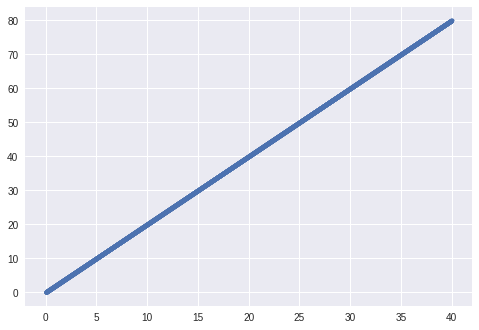

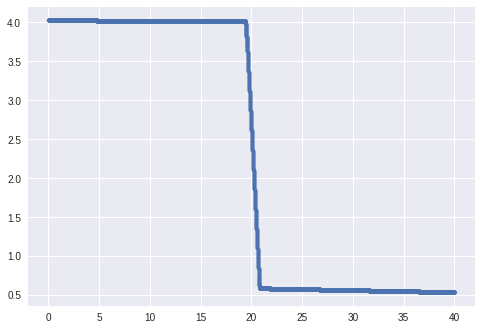

In [4]:
result = model.predict(x)
plt.plot(x, result[:,0],'.')
plt.show()
plt.plot(x, result[:,1],'.')
plt.show()